In [1]:
# load environment
import numpy as py
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
# make the charts show in the jupyter output

print("ready")

ready


In [2]:
# load the dataset

afp = pd.read_csv('./datasets/africa_food_prices.csv')



In [3]:
# high-level overview of data shape and composition
print(afp.shape)
print(afp.head(5))

(956779, 19)
   Unnamed: 0  country_id  country  state_id  state  market_id   market  \
0       15427         4.0  Algeria       344  Alger       1794  Algiers   
1       15428         4.0  Algeria       344  Alger       1794  Algiers   
2       15429         4.0  Algeria       344  Alger       1794  Algiers   
3       15430         4.0  Algeria       344  Alger       1794  Algiers   
4       15431         4.0  Algeria       344  Alger       1794  Algiers   

   produce_id        produce  currency_id currency  pt_id market_type  \
0          52  Rice - Retail          0.0      DZD     15      Retail   
1          52  Rice - Retail          0.0      DZD     15      Retail   
2          52  Rice - Retail          0.0      DZD     15      Retail   
3          52  Rice - Retail          0.0      DZD     15      Retail   
4          52  Rice - Retail          0.0      DZD     15      Retail   

   um_unit_id quantity  month  year  price  mp_commoditysource  
0           5       KG      4  2

In [4]:
# checking the non null values and datatypes in each column of the Dataset. 
afp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956779 entries, 0 to 956778
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0          956779 non-null  int64  
 1   country_id          956779 non-null  float64
 2   country             956779 non-null  object 
 3   state_id            956779 non-null  int64  
 4   state               830101 non-null  object 
 5   market_id           956779 non-null  int64  
 6   market              956779 non-null  object 
 7   produce_id          956779 non-null  int64  
 8   produce             956779 non-null  object 
 9   currency_id         956779 non-null  float64
 10  currency            956779 non-null  object 
 11  pt_id               956779 non-null  int64  
 12  market_type         956779 non-null  object 
 13  um_unit_id          956779 non-null  int64  
 14  quantity            956779 non-null  object 
 15  month               956779 non-nul

In [5]:
# check for duplicate 
sum(afp.duplicated())

0

In [6]:
# checking for missing records
afp.isna().sum()

Unnamed: 0                 0
country_id                 0
country                    0
state_id                   0
state                 126678
market_id                  0
market                     0
produce_id                 0
produce                    0
currency_id                0
currency                   0
pt_id                      0
market_type                0
um_unit_id                 0
quantity                   0
month                      0
year                       0
price                      0
mp_commoditysource    956779
dtype: int64

In [7]:
afp.columns

Index(['Unnamed: 0', 'country_id', 'country', 'state_id', 'state', 'market_id',
       'market', 'produce_id', 'produce', 'currency_id', 'currency', 'pt_id',
       'market_type', 'um_unit_id', 'quantity', 'month', 'year', 'price',
       'mp_commoditysource'],
      dtype='object')

In [8]:
# dropping of columns
cols_to_drop = ['Unnamed: 0', 'mp_commoditysource']

In [9]:
afp.drop(columns=cols_to_drop, axis = 1, inplace=True)
afp.head(5)

,country_id,country,state_id,state,market_id,market,produce_id,produce,currency_id,currency,pt_id,market_type,um_unit_id,quantity,month,year,price
0,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,4,2015,90.0
1,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,5,2015,96.0
2,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,6,2015,96.0
3,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,7,2015,83.0
4,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,8,2015,80.0


In [10]:
# copying the loan dataframe into a new variable
afp_clean = afp.copy()

In [11]:
# showing the dataframe statistics
afp_clean.describe()

,country_id,state_id,market_id,produce_id,currency_id,pt_id,um_unit_id,month,year,price
count,956779.000000,956779.000000,956779.000000,956779.000000,956779.0,956779.000000,956779.000000,956779.000000,956779.000000,9.567790e+05
mean,1961.192782,22287.911831,1392.594222,186.141214,0.0,14.926716,14.017183,6.381471,2015.704015,4.128833e+03
std,10404.034922,98565.608270,1027.751212,165.401303,0.0,0.263570,24.437728,3.418025,4.603829,1.381840e+05
min,4.000000,0.000000,101.000000,50.000000,0.0,14.000000,5.000000,1.000000,1990.000000,0.000000e+00
25%,90.000000,1836.000000,528.000000,67.000000,0.0,15.000000,5.000000,3.000000,2013.000000,6.500000e+01
50%,155.000000,2209.000000,1078.000000,105.000000,0.0,15.000000,5.000000,6.000000,2017.000000,2.505714e+02
75%,205.000000,21971.000000,2281.000000,262.000000,0.0,15.000000,9.000000,9.000000,2020.000000,7.221005e+02
max,70001.000000,900003.000000,6081.000000,887.000000,0.0,17.000000,175.000000,12.000000,2021.000000,1.725000e+07


In [12]:
# To replace the null values.

afp_clean.state.fillna("Unknown", inplace= True)

In [13]:
afp_clean.columns

Index(['country_id', 'country', 'state_id', 'state', 'market_id', 'market',
       'produce_id', 'produce', 'currency_id', 'currency', 'pt_id',
       'market_type', 'um_unit_id', 'quantity', 'month', 'year', 'price'],
      dtype='object')

In [14]:
afp_clean.isna().sum()

country_id     0
country        0
state_id       0
state          0
market_id      0
market         0
produce_id     0
produce        0
currency_id    0
currency       0
pt_id          0
market_type    0
um_unit_id     0
quantity       0
month          0
year           0
price          0
dtype: int64

### EXPLORATORY DATA ANALYSIS

In [15]:
dy = afp_clean.copy()

In [16]:
dy.head(5)

,country_id,country,state_id,state,market_id,market,produce_id,produce,currency_id,currency,pt_id,market_type,um_unit_id,quantity,month,year,price
0,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,4,2015,90.0
1,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,5,2015,96.0
2,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,6,2015,96.0
3,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,7,2015,83.0
4,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,8,2015,80.0


In [17]:
dy.state.unique()

array(['Alger', 'Tindouf', 'Luanda', 'Lunda Norte', 'Alibori', 'Atakora',
       'Atlantique', 'Borgou', 'Collines', 'Couffo', 'Donga', 'Littoral',
       'Mono', 'Oueme', 'Plateau', 'Zou', 'Bubanza', 'Bujumbura Mairie',
       'Bujumbura Rural', 'Bururi', 'Cankuzo', 'Cibitoke', 'Gitega',
       'Karuzi', 'Kayanza', 'Kirundo', 'Makamba', 'Muramvya', 'Muyinga',
       'Mwaro', 'Ngozi', 'Rutana', 'Ruyigi', 'Adamaoua', 'Centre', 'Est',
       'Extreme - Nord', 'Nord', 'Nord - Ouest', 'Ouest', 'Sud - Ouest',
       'Santiago', 'Santo Antao', 'Sao Vicente', 'Bamingui-Bangoran',
       'Haut-Mbomou', 'Haute-Kotto', 'Kémo', 'Lobaye', 'Mambéré-Kadéï',
       'Mbomou', 'Nana-Gribizi', 'Nana-Mambéré', "Ombella M'Poko",
       'Ouaka', 'Ouham', 'Ouham Pendé', 'Sangha-Mbaéré', 'Vakaga',
       'Bangui', 'Unknown', 'Bouenza', 'Cuvette', 'Lekoumou', 'Likouala',
       'Pool', 'Point-Noire', 'Brazzaville', 'Ali Sabieh', 'Dikhil',
       'Djibouti', 'Obock', 'Tadjourah', 'Maekel', 'Semenawi Keih Bahri

In [18]:
len(dy.state.unique())

312

In [19]:
dy.market.unique()

array(['Algiers', 'Tindouf', 'Samara', ..., 'Rutendo 6', 'Matibi',
       'Mbilashaba'], dtype=object)

In [20]:
len(dy.market.unique())

1696

In [21]:
dy.country.unique()

array(['Algeria', 'Angola', 'Benin', 'Burundi', 'Cameroon', 'Cape Verde',
       'Central African Republic', 'Chad', 'Congo', 'Djibouti', 'Egypt',
       'Eritrea', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea',
       'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Libya',
       'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique',
       'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Senegal', 'Sierra Leone',
       'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Swaziland',
       'Togo', 'Uganda', 'Zambia', 'Zimbabwe'], dtype=object)

In [22]:
len(dy.country.unique())

42

In [23]:
dy.currency.unique()

array(['DZD', 'AOA', 'XOF', 'BIF', 'XAF', 'CVE', 'DJF', 'EGP', 'ERN',
       'ETB', 'GMD', 'GHS', 'GNF', 'KES', 'LSL', 'LRD', 'LYD', 'MGA',
       'MWK', 'MRO', 'MZN', 'NAD', 'NGN', 'RWF', 'SLL', 'SOS', 'ZAR',
       'SSP', 'SDG', 'SZL', 'UGX', 'ZMW', 'USD', 'ZWL'], dtype=object)

In [24]:
len(dy.currency.unique())

34

In [25]:
dy.market_type.unique()

array(['Retail', 'Wholesale', 'Producer'], dtype=object)

In [26]:
len(dy.market_type.unique())

3

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


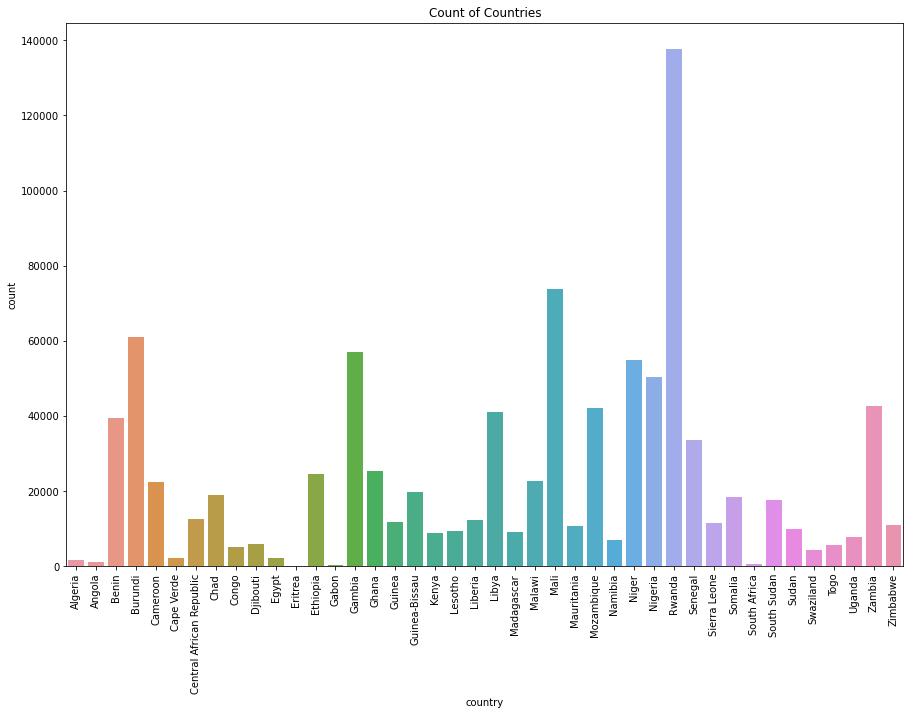

In [27]:
plt.figure(figsize= (15,10))
sb.countplot(dy.country)
plt.title("Count of Countries")
plt.xticks(rotation = 90)
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


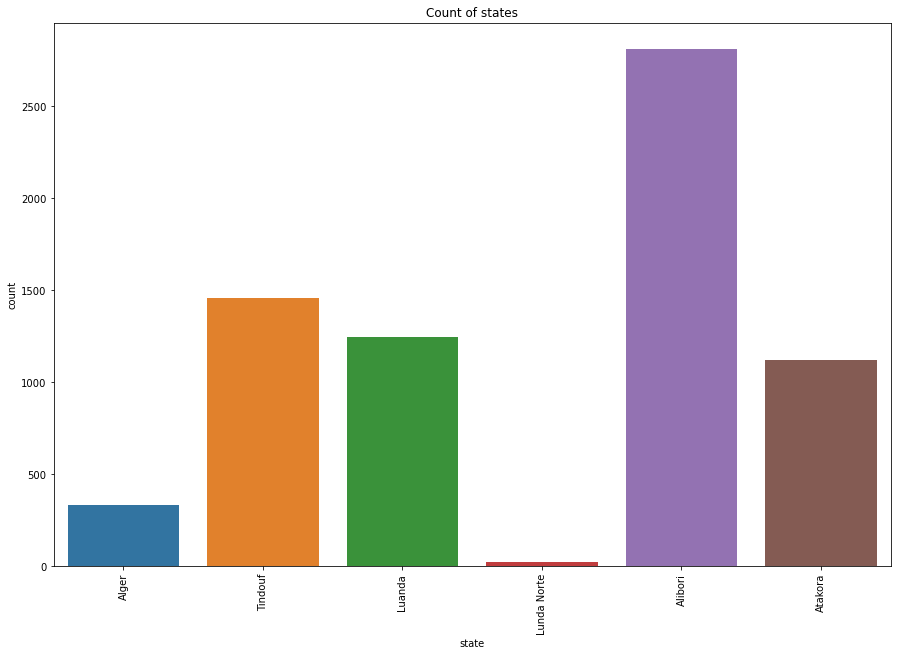

In [28]:
plt.figure(figsize= (15,10))
sb.countplot(dy.state[0:7000])
plt.title("Count of states")
plt.xticks(rotation = 90)
plt.show()

# The plot above is the count of the state from index 0-7000 

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


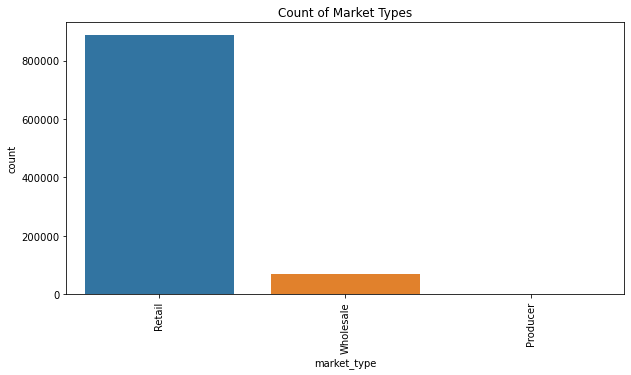

In [29]:
plt.figure(figsize= (10,5))
sb.countplot(dy.market_type)
plt.title("Count of Market Types")
plt.xticks(rotation = 90)
plt.show()

## EXPLORATORY DATA ANALYSIS ON THE THREE MARKET TYPES, Namely: Producer, Retail And Wholesale were carried out as shown below

In [30]:
# Exploring the market_type column 
mrk_typ = dy.groupby("market_type")
mrk_typ.last()

,country_id,country,state_id,state,market_id,market,produce_id,produce,currency_id,currency,pt_id,um_unit_id,quantity,month,year,price
market_type,,,,,,,,,,,,,,,,
Producer,150.0,Madagascar,899999,Alaotra Mangoro,754,Alaotra Mangoro (Region),203,Rice (paddy) - Producer,0.0,MGA,17,5,KG,9,2012,580.0
Retail,271.0,Zimbabwe,3444,Midlands,5594,Mbilashaba,887,Fish (kapenta) - Retail,0.0,ZWL,15,5,KG,6,2021,1200.0
Wholesale,253.0,Uganda,47082,Lira,263,Lira,147,Plantains - Wholesale,0.0,UGX,14,5,KG,11,2018,1000.0


## PRODUCER ANALYSIS

## Producer Market Type below will show The Analysis and Visualizations of the least five prices

In [31]:
prd_mkt = dy[dy["market_type"] == "Producer"]
prd_mkt

,country_id,country,state_id,state,market_id,market,produce_id,produce,currency_id,currency,pt_id,market_type,um_unit_id,quantity,month,year,price
384613,150.0,Madagascar,1881,Atsinanana,750,Atsinanana (Region),203,Rice (paddy) - Producer,0.0,MGA,17,Producer,5,KG,4,2011,950.0
384614,150.0,Madagascar,1881,Atsinanana,750,Atsinanana (Region),203,Rice (paddy) - Producer,0.0,MGA,17,Producer,5,KG,5,2011,950.0
384615,150.0,Madagascar,1881,Atsinanana,750,Atsinanana (Region),203,Rice (paddy) - Producer,0.0,MGA,17,Producer,5,KG,6,2011,950.0
384616,150.0,Madagascar,1881,Atsinanana,750,Atsinanana (Region),203,Rice (paddy) - Producer,0.0,MGA,17,Producer,5,KG,7,2011,950.0
384617,150.0,Madagascar,1881,Atsinanana,750,Atsinanana (Region),203,Rice (paddy) - Producer,0.0,MGA,17,Producer,5,KG,8,2011,950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393411,150.0,Madagascar,899999,Alaotra Mangoro,754,Alaotra Mangoro (Region),203,Rice (paddy) - Producer,0.0,MGA,17,Producer,5,KG,5,2012,540.0
393412,150.0,Madagascar,899999,Alaotra Mangoro,754,Alaotra Mangoro (Region),203,Rice (paddy) - Producer,0.0,MGA,17,Producer,5,KG,6,2012,462.0
393413,150.0,Madagascar,899999,Alaotra Mangoro,754,Alaotra Mangoro (Region),203,Rice (paddy) - Producer,0.0,MGA,17,Producer,5,KG,7,2012,500.0
393414,150.0,Madagascar,899999,Alaotra Mangoro,754,Alaotra Mangoro (Region),203,Rice (paddy) - Producer,0.0,MGA,17,Producer,5,KG,8,2012,544.0


In [32]:
prd_mkt[["country","state","market","produce","year","price"]]

,country,state,market,produce,year,price
384613,Madagascar,Atsinanana,Atsinanana (Region),Rice (paddy) - Producer,2011,950.0
384614,Madagascar,Atsinanana,Atsinanana (Region),Rice (paddy) - Producer,2011,950.0
384615,Madagascar,Atsinanana,Atsinanana (Region),Rice (paddy) - Producer,2011,950.0
384616,Madagascar,Atsinanana,Atsinanana (Region),Rice (paddy) - Producer,2011,950.0
384617,Madagascar,Atsinanana,Atsinanana (Region),Rice (paddy) - Producer,2011,950.0
...,...,...,...,...,...,...
393411,Madagascar,Alaotra Mangoro,Alaotra Mangoro (Region),Rice (paddy) - Producer,2012,540.0
393412,Madagascar,Alaotra Mangoro,Alaotra Mangoro (Region),Rice (paddy) - Producer,2012,462.0
393413,Madagascar,Alaotra Mangoro,Alaotra Mangoro (Region),Rice (paddy) - Producer,2012,500.0
393414,Madagascar,Alaotra Mangoro,Alaotra Mangoro (Region),Rice (paddy) - Producer,2012,544.0


In [121]:
pd = prd_mkt[["country","state","market","produce","year","price"]].nsmallest(n=5, columns = "price")
pd

,country,state,market,produce,year,price
386877,Madagascar,Melaky,Melaky (Region),Rice (paddy) - Producer,2011,220.0
387563,Madagascar,Haute Matsiatra,Ihorombe (Region),Rice (paddy) - Producer,2011,360.0
385904,Madagascar,Sofia,Sofia (Region),Rice (paddy) - Producer,2011,410.0
385905,Madagascar,Sofia,Sofia (Region),Rice (paddy) - Producer,2011,414.0
387562,Madagascar,Haute Matsiatra,Ihorombe (Region),Rice (paddy) - Producer,2011,420.0


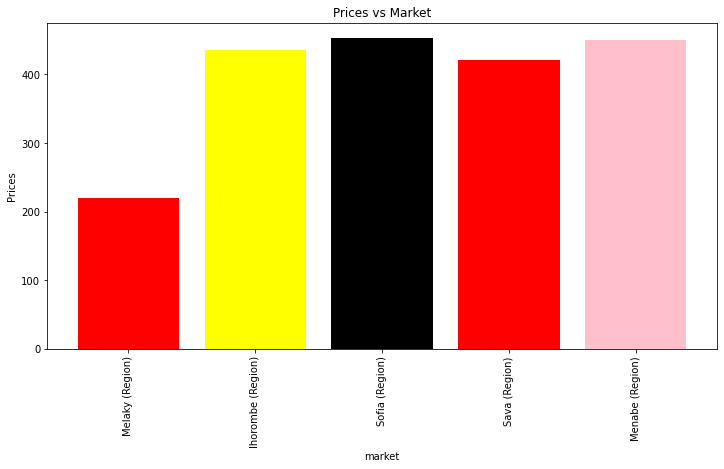

In [119]:
x = pd.market
y = pd.price
colors = ("red","blue", "yellow", "pink","black")

plt.figure(figsize=(12,6))
plt.bar(x,y, color = colors)
plt.title("Prices vs Market")
plt.xlabel("market")
plt.ylabel("Prices")
plt.xticks(rotation=90)
plt.show()

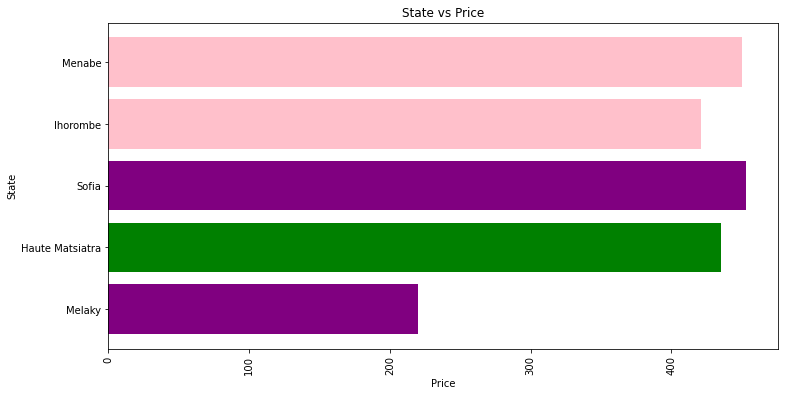

In [120]:
x = pd.state
y = pd.price
colors = ("purple", "green", "pink")

plt.figure(figsize=(12,6))
plt.barh(x,y, color = colors)
plt.title("State vs Price")
plt.xlabel("Price")
plt.ylabel("State")
plt.xticks(rotation=90)
plt.show()

## RETAIL ANALYSIS

## Retail Market Type below will show The Analysis and Visualizations of the least ten prices

In [37]:
retail_mkt = dy[dy["market_type"] == "Retail"]
retail_mkt

,country_id,country,state_id,state,market_id,market,produce_id,produce,currency_id,currency,pt_id,market_type,um_unit_id,quantity,month,year,price
0,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,4,2015,90.0000
1,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,5,2015,96.0000
2,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,6,2015,96.0000
3,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,7,2015,83.0000
4,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,8,2015,80.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
956774,271.0,Zimbabwe,3444,Midlands,5594,Mbilashaba,432,Beans (sugar) - Retail,0.0,ZWL,15,Retail,5,KG,6,2021,233.3333
956775,271.0,Zimbabwe,3444,Midlands,5594,Mbilashaba,539,Toothpaste - Retail,0.0,ZWL,15,Retail,116,100 ML,6,2021,112.5000
956776,271.0,Zimbabwe,3444,Midlands,5594,Mbilashaba,540,Laundry soap - Retail,0.0,ZWL,15,Retail,5,KG,6,2021,114.0000
956777,271.0,Zimbabwe,3444,Midlands,5594,Mbilashaba,541,Handwash soap - Retail,0.0,ZWL,15,Retail,66,250 G,6,2021,59.5000


In [38]:
retail_mkt[["country","state","market","produce","quantity","month","year","price"]]

,country,state,market,produce,quantity,month,year,price
0,Algeria,Alger,Algiers,Rice - Retail,KG,4,2015,90.0000
1,Algeria,Alger,Algiers,Rice - Retail,KG,5,2015,96.0000
2,Algeria,Alger,Algiers,Rice - Retail,KG,6,2015,96.0000
3,Algeria,Alger,Algiers,Rice - Retail,KG,7,2015,83.0000
4,Algeria,Alger,Algiers,Rice - Retail,KG,8,2015,80.0000
...,...,...,...,...,...,...,...,...
956774,Zimbabwe,Midlands,Mbilashaba,Beans (sugar) - Retail,KG,6,2021,233.3333
956775,Zimbabwe,Midlands,Mbilashaba,Toothpaste - Retail,100 ML,6,2021,112.5000
956776,Zimbabwe,Midlands,Mbilashaba,Laundry soap - Retail,KG,6,2021,114.0000
956777,Zimbabwe,Midlands,Mbilashaba,Handwash soap - Retail,250 G,6,2021,59.5000


In [103]:

rt = retail_mkt[["country","state","market","produce","quantity","month","year","price"]].nsmallest(n=10, columns= "price")
rt

,country,state,market,produce,quantity,month,year,price
203015,Gambia,Central River,Kaur Wharf Town,Fonio - Retail,KG,2,2017,0.0000
355191,Libya,Unknown,Alkufra,Laundry soap - Retail,KG,5,2019,0.0100
360756,Libya,Unknown,Benghazi,Laundry soap - Retail,KG,5,2019,0.0100
369145,Libya,Unknown,Murzuq,Laundry soap - Retail,KG,5,2019,0.0100
373295,Libya,Unknown,Sebha,Laundry soap - Retail,KG,5,2019,0.0100
926840,Zambia,North-Western,Chavuma,Groundnuts (shelled) - Retail,KG,11,2012,0.0125
347856,Libya,Unknown,Ghat,Laundry soap - Retail,KG,5,2019,0.0200
954079,Zimbabwe,Matabeleland South,Plumtree town,Millet - Retail,KG,2,2018,0.1300
914631,Zambia,Eastern,Chadiza,Maize (white) - Retail,KG,9,2012,0.1389
948435,Zimbabwe,Mashonaland Central,Chimhanda Business Centre,Sorghum - Retail,KG,10,2017,0.1400


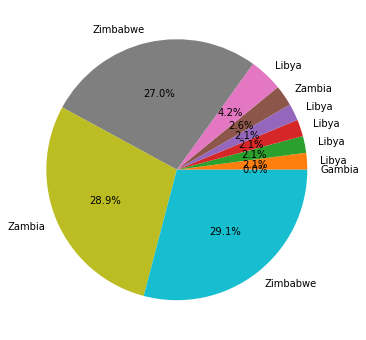

In [105]:
plt.figure(figsize=(10,6))
plt.pie(rt.price, autopct="%0.1f%%", normalize=True, labels = rt.country) 
plt.show()

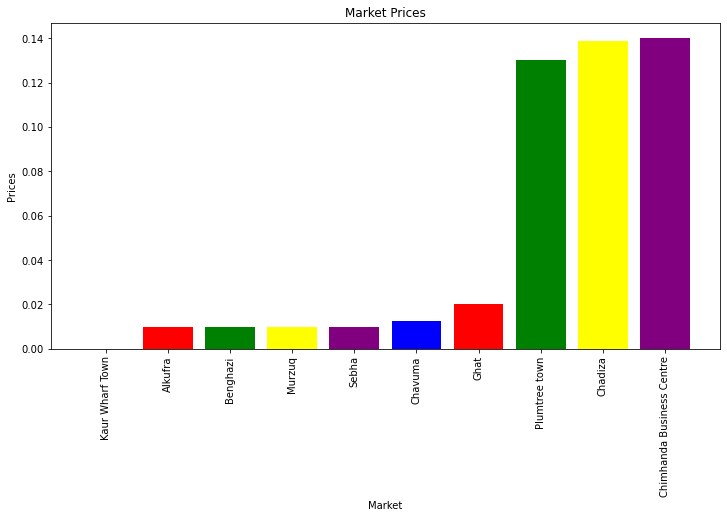

In [115]:
x = rt.market
y = rt.price
colors = ("blue", "red", "green", "yellow", "purple")

plt.figure(figsize=(12,6))
plt.bar(x,y, color = colors)
plt.title("Market Prices")
plt.xlabel("Market")
plt.ylabel("Prices")
plt.xticks(rotation=90)
plt.show()

## WHOLESALE ANALYSIS

## Wholesale Market Type: Below will show The Analysis and Visualizations of the top ten prices

In [41]:
whosale_mkt = dy[dy["market_type"] == "Wholesale"]
whosale_mkt

,country_id,country,state_id,state,market_id,market,produce_id,produce,currency_id,currency,pt_id,market_type,um_unit_id,quantity,month,year,price
3065,29.0,Benin,609,Alibori,1044,Malanville (CBM),51,Maize - Wholesale,0.0,XOF,14,Wholesale,5,KG,1,2002,145.00
3066,29.0,Benin,609,Alibori,1044,Malanville (CBM),51,Maize - Wholesale,0.0,XOF,14,Wholesale,5,KG,1,2003,106.00
3067,29.0,Benin,609,Alibori,1044,Malanville (CBM),51,Maize - Wholesale,0.0,XOF,14,Wholesale,5,KG,2,2003,107.50
3068,29.0,Benin,609,Alibori,1044,Malanville (CBM),51,Maize - Wholesale,0.0,XOF,14,Wholesale,5,KG,3,2003,95.00
3069,29.0,Benin,609,Alibori,1044,Malanville (CBM),51,Maize - Wholesale,0.0,XOF,14,Wholesale,5,KG,4,2003,95.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902012,253.0,Uganda,47082,Lira,263,Lira,147,Plantains - Wholesale,0.0,UGX,14,Wholesale,5,KG,7,2018,1062.50
902013,253.0,Uganda,47082,Lira,263,Lira,147,Plantains - Wholesale,0.0,UGX,14,Wholesale,5,KG,8,2018,910.00
902014,253.0,Uganda,47082,Lira,263,Lira,147,Plantains - Wholesale,0.0,UGX,14,Wholesale,5,KG,9,2018,900.00
902015,253.0,Uganda,47082,Lira,263,Lira,147,Plantains - Wholesale,0.0,UGX,14,Wholesale,5,KG,10,2018,983.33


In [42]:
ws = whosale_mkt[["country", "state", "market", "produce", "quantity", "month", "year", "price"]].nlargest(n=10, columns= "price")
ws

,country,state,market,produce,quantity,month,year,price
107814,Cameroon,Est,Bertoua 2,Onions - Wholesale,90 KG,11,2018,160000.0
107999,Cameroon,Est,Bertoua 1,Onions - Wholesale,90 KG,11,2018,160000.0
108534,Cameroon,Est,Mandjou,Onions - Wholesale,90 KG,11,2018,145000.0
107815,Cameroon,Est,Bertoua 2,Onions - Wholesale,90 KG,12,2018,120000.0
108000,Cameroon,Est,Bertoua 1,Onions - Wholesale,90 KG,12,2018,120000.0
114569,Cameroon,Extreme - Nord,Mokolo,Onions - Wholesale,100 KG,10,2018,120000.0
114570,Cameroon,Extreme - Nord,Mokolo,Onions - Wholesale,100 KG,11,2018,120000.0
111699,Cameroon,Extreme - Nord,Mada,Beans (niebe) - Wholesale,90 KG,9,2012,112000.0
113936,Cameroon,Extreme - Nord,Mora,Sesame - Wholesale,90 KG,4,2019,112000.0
108535,Cameroon,Est,Mandjou,Onions - Wholesale,90 KG,12,2018,110000.0


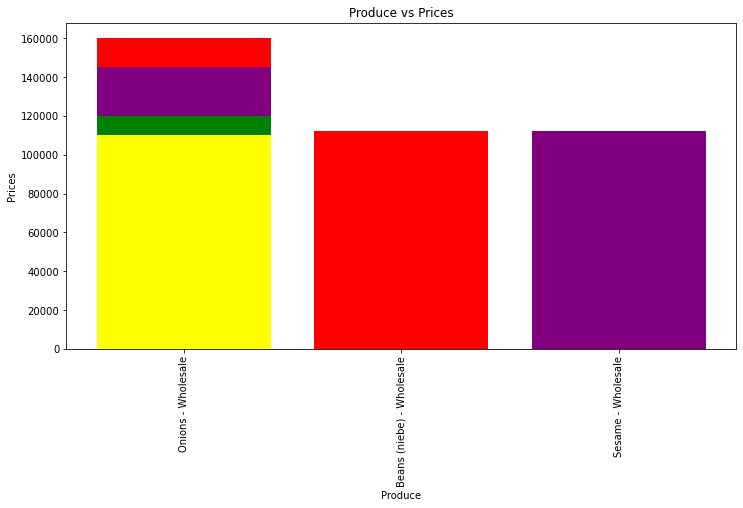

In [74]:
x = ws.produce
y = ws.price
colors = ("green","red", "purple", "yellow", "pink","blue")

plt.figure(figsize=(12,6))
plt.bar(x,y, color = colors)
plt.title("Produce vs Prices")
plt.xlabel("Produce")
plt.ylabel("Prices")
plt.xticks(rotation=90)
plt.show()

## VISUALIZATIONS

# Visualizations would be made on one of the countries, which is Swizaland by being extracted from the dataset. The loc will be  used to ascertain the starting index and last index number of the extracted dataset Swizaland.

In [44]:
afp_clean

,country_id,country,state_id,state,market_id,market,produce_id,produce,currency_id,currency,pt_id,market_type,um_unit_id,quantity,month,year,price
0,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,4,2015,90.0000
1,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,5,2015,96.0000
2,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,6,2015,96.0000
3,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,7,2015,83.0000
4,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,8,2015,80.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
956774,271.0,Zimbabwe,3444,Midlands,5594,Mbilashaba,432,Beans (sugar) - Retail,0.0,ZWL,15,Retail,5,KG,6,2021,233.3333
956775,271.0,Zimbabwe,3444,Midlands,5594,Mbilashaba,539,Toothpaste - Retail,0.0,ZWL,15,Retail,116,100 ML,6,2021,112.5000
956776,271.0,Zimbabwe,3444,Midlands,5594,Mbilashaba,540,Laundry soap - Retail,0.0,ZWL,15,Retail,5,KG,6,2021,114.0000
956777,271.0,Zimbabwe,3444,Midlands,5594,Mbilashaba,541,Handwash soap - Retail,0.0,ZWL,15,Retail,66,250 G,6,2021,59.5000


In [45]:
EW = dy.loc[dy["country"] == "Swaziland"]
EW

,country_id,country,state_id,state,market_id,market,produce_id,produce,currency_id,currency,pt_id,market_type,um_unit_id,quantity,month,year,price
885386,235.0,Swaziland,0,Unknown,101,National Average,52,Rice - Retail,0.0,SZL,15,Retail,5,KG,1,2008,4.030
885387,235.0,Swaziland,0,Unknown,101,National Average,52,Rice - Retail,0.0,SZL,15,Retail,5,KG,2,2008,4.030
885388,235.0,Swaziland,0,Unknown,101,National Average,52,Rice - Retail,0.0,SZL,15,Retail,5,KG,3,2008,4.628
885389,235.0,Swaziland,0,Unknown,101,National Average,52,Rice - Retail,0.0,SZL,15,Retail,5,KG,4,2008,4.954
885390,235.0,Swaziland,0,Unknown,101,National Average,52,Rice - Retail,0.0,SZL,15,Retail,5,KG,5,2008,5.872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889628,235.0,Swaziland,2784,Unknown,2654,Manzini,432,Beans (sugar) - Retail,0.0,SZL,15,Retail,5,KG,5,2020,23.000
889629,235.0,Swaziland,2784,Unknown,2654,Manzini,432,Beans (sugar) - Retail,0.0,SZL,15,Retail,5,KG,6,2020,22.500
889630,235.0,Swaziland,2784,Unknown,2654,Manzini,432,Beans (sugar) - Retail,0.0,SZL,15,Retail,5,KG,7,2020,22.500
889631,235.0,Swaziland,2784,Unknown,2654,Manzini,432,Beans (sugar) - Retail,0.0,SZL,15,Retail,5,KG,8,2020,22.500


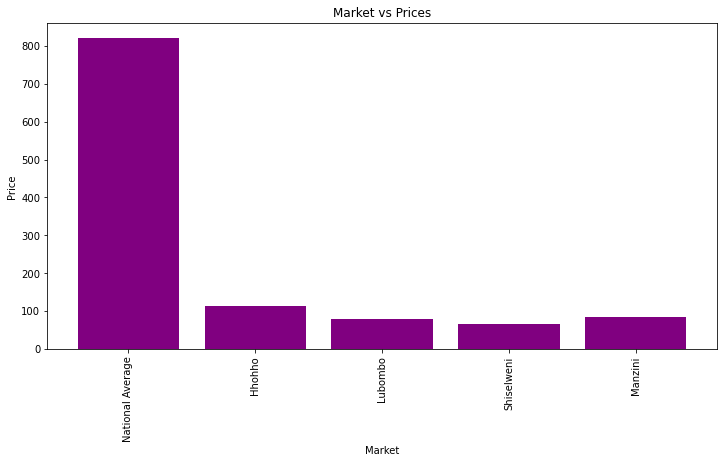

In [117]:
x = afp_clean.market[885388:889632]
y = afp_clean.price[885388:889632]
plt.figure(figsize=(12,6))
plt.bar(x,y, color = 'purple')
plt.title("Market vs Prices")
plt.xlabel("Market")
plt.ylabel("Price")
plt.xticks(rotation=90)
plt.show()

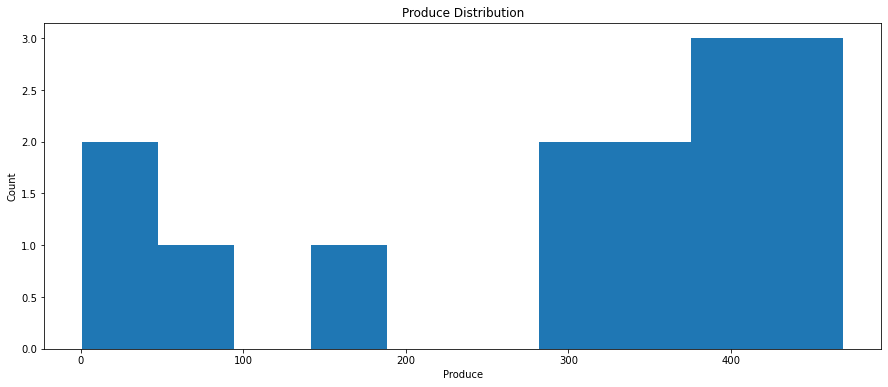

In [47]:
x = afp_clean.produce[885386:889632].value_counts()

plt.figure(figsize=(15,6))
plt.title("Produce Distribution")
plt.xlabel("Produce")
plt.ylabel("Count")
plt.hist(x)
plt.show()

In [48]:
month = afp_clean.month.value_counts()


<AxesSubplot:title={'center':'Month Count'}, xlabel='Month', ylabel='Count'>

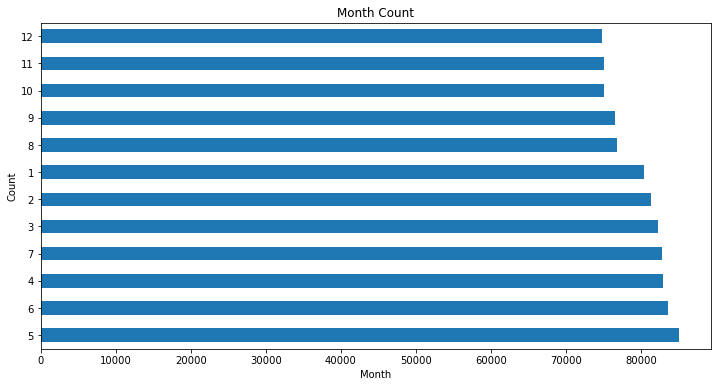

In [49]:
plt.figure(figsize=(12,6))
plt.title("Month Count")
plt.xlabel("Month")
plt.ylabel("Count")
month.plot(kind='barh')

In [50]:
cur_count= afp_clean.currency.value_counts()


<AxesSubplot:title={'center':'Count Of Currency'}, xlabel='Currency', ylabel='No of count'>

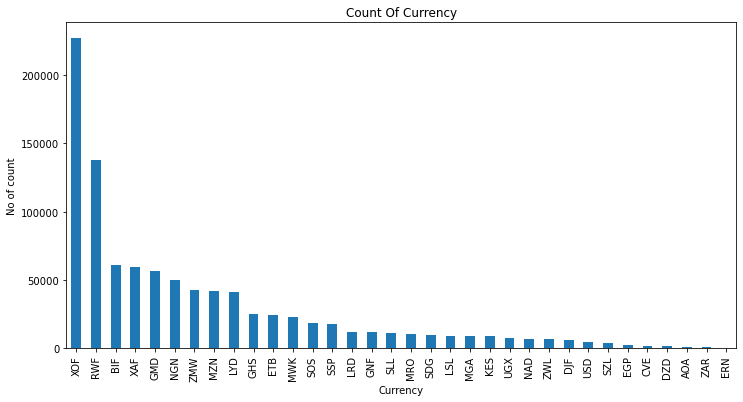

In [51]:
plt.figure(figsize=(12,6))
plt.title("Count Of Currency")
plt.xlabel("Currency")
plt.ylabel("No of count")
cur_count.plot(kind='bar')

<AxesSubplot:ylabel='produce'>

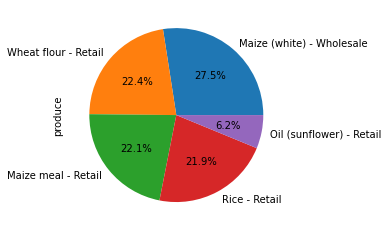

In [52]:
afp_clean.produce[885388:886000	].value_counts().plot(kind='pie', autopct="%0.1f%%")

<AxesSubplot:ylabel='market'>

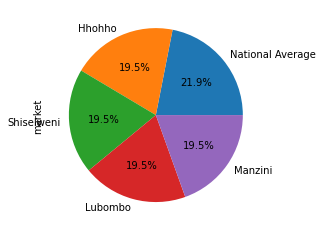

In [53]:
afp_clean.market[885388:889632].value_counts().plot(kind='pie', autopct="%0.1f%%")

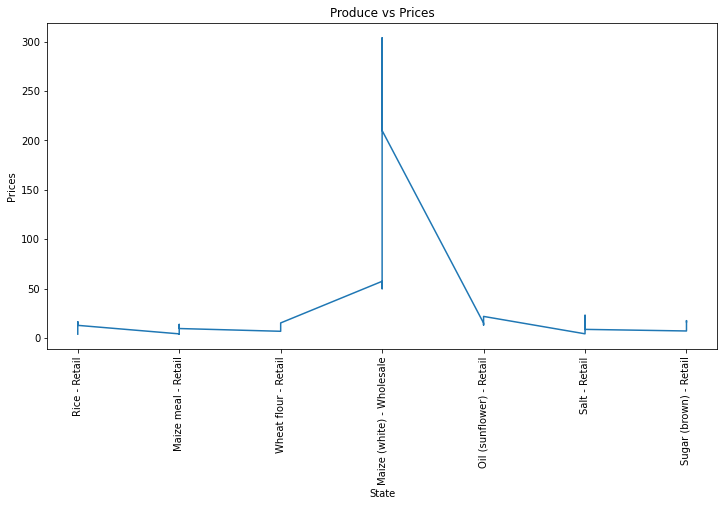

In [54]:
x = afp_clean.produce[885386:886200	]
y = afp_clean.price[885386:886200	]


plt.figure(figsize=(12,6))
plt.plot(x,y)
plt.title("Produce vs Prices")
plt.xlabel("State")
plt.ylabel("Prices")
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:ylabel='quantity'>

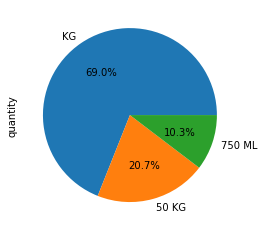

In [55]:
afp_clean.quantity[885388:886200].value_counts().plot(kind='pie', autopct="%0.1f%%")

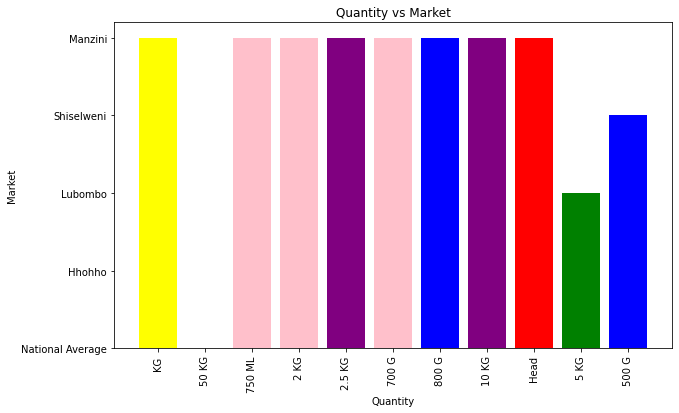

In [56]:
x = afp_clean.quantity[885386:889632]
y = afp_clean.market[885386:889632]
colors = ("green", "red", "pink", "yellow", "blue", "purple")

plt.figure(figsize=(10,6))
plt.bar(x,y, color = colors)
plt.title("Quantity vs Market")
plt.xlabel("Quantity")
plt.ylabel("Market")
plt.xticks(rotation=90)
plt.show()

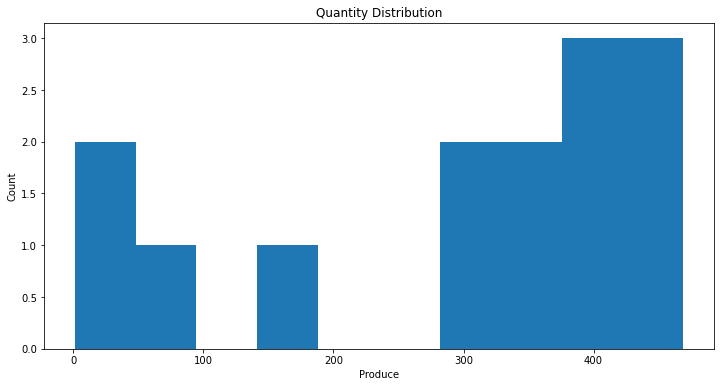

In [57]:
x = afp_clean.produce[885386:889632].value_counts()

plt.figure(figsize=(12,6))
plt.title("Quantity Distribution")
plt.xlabel("Produce")
plt.ylabel("Count")
plt.hist(x)
plt.show()

<AxesSubplot:ylabel='market_type'>

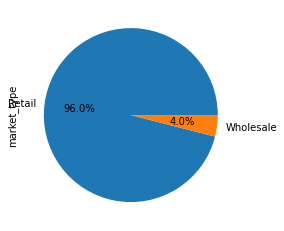

In [58]:
afp_clean.market_type[885386:889632].value_counts().plot(kind='pie', autopct="%0.1f%%")

## SUMMARY 

Exploratory Data Analysis (EDA) was carried out on the Arica Food Price dataset. The len function was used to determine the unique count of the market, country,currency and state columns. The describe function was as well used
to determine the mean values, count, standard deviation, minimum and maximum values for the numerical columns in the datasets which include the year, month and the quantity.
Using the len function, three market types were discovered, namely;Producer, Wholesale and Retail and analysis were carried out on them. 
As regards that of the producer markets, analysis and charts were drawn for the least five 
prices in the producer market which captured the country Madagascar as the only country in the category, then bar charts were plotted prices against prices of the market and states to show the relationship between them. In the retail segment, analysis and chart were carried out on the countries with the least then prices, which showed the following countries; Gambia, Libya,
Zambia and Zimbabwe in this category. Pie Charts were made for the countries with the lowest
prices and furthermore bar chart was used to establish the relationship between market and prices.  
Lastly, analysis was made for the top ten largest price in the Wholesale market segment in which 
Cameroon was the only country shown in this market segment. 
Bar charts were used to show the relationships between the produce and price.


Finally, Swaziland as one of the African country was extracted from the datasets using the loc function
and visualizations were made on it.To determine the starting index and last 
index numbers, the loc funtion was used and Visualizations were carried out. Bar charts, pie charts,line charts and histogram were used to show various relationships between states, markets, produce, 
months and prices in Swaziland as an African country. For the entire dataset, count plots were made for currency
and month using bar charts.
